In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [ ]:
df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
df.nunique()

Customer ID                     7043
Tenure Months                     73
Location                           2
Device Class                       3
Games Product                      3
Music Product                      3
Education Product                  3
Call Center                        2
Video Product                      3
Use MyApp                          3
Payment Method                     4
Monthly Purchase (Thou. IDR)    1585
Churn Label                        2
Longitude                          2
Latitude                           2
CLTV (Predicted Thou. IDR)      3438
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

## Data Preparation

In [ ]:
df_train = df.drop(['Customer ID', 'Longitude', 'Latitude'], axis=1)

In [ ]:
for i in df.select_dtypes(include='object'):
    print(f"{i}: {df[i].unique()}")

Location: ['Jakarta' 'Bandung']
Device Class: ['Mid End' 'High End' 'Low End']
Games Product: ['Yes' 'No' 'No internet service']
Music Product: ['Yes' 'No' 'No internet service']
Education Product: ['No' 'Yes' 'No internet service']
Call Center: ['No' 'Yes']
Video Product: ['No' 'Yes' 'No internet service']
Use MyApp: ['No' 'Yes' 'No internet service']
Payment Method: ['Digital Wallet' 'Pulsa' 'Debit' 'Credit']
Churn Label: ['Yes' 'No']


In [ ]:
# Replace Column Value
# Define a mapping for each column
mapping = {
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Games Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Music Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Education Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Use MyApp': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Payment Method': {'Digital Wallet': 0, 'Pulsa': 1, 'Debit': 2, 'Credit': 3},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df_train = df_train.replace(mapping)

In [ ]:
df_train

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,2,1,1,2,2,1,0,1,1,0,70.005,1,4210.7
1,2,1,2,1,1,1,0,1,1,1,91.910,1,3511.3
2,8,1,2,1,1,2,0,2,2,1,129.545,1,6983.6
3,28,1,2,1,1,2,1,2,2,1,136.240,1,6503.9
4,49,1,2,1,2,2,0,2,2,2,134.810,1,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,1,0,0,0,0,0,0,0,2,27.495,0,6897.8
7039,24,1,1,2,1,2,1,2,2,0,110.240,0,2782.0
7040,72,1,2,1,2,2,0,2,2,3,134.160,0,7228.0
7041,11,1,1,2,1,1,0,1,1,1,38.480,0,3630.9


# Train Model

In [ ]:
train=df_train.sample(n=6000)
train.shape

(6000, 13)

In [ ]:
train.columns

Index(['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase (Thou. IDR)',
       'Churn Label', 'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
y = train.pop('CLTV (Predicted Thou. IDR)')
X = train

In [ ]:
X

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label
4699,10,1,0,0,0,0,0,0,0,3,26.00,0
1371,20,0,2,1,1,2,0,2,1,1,115.31,1
5669,55,0,0,0,0,0,0,0,0,3,33.34,0
6307,12,1,1,1,1,1,1,1,1,0,38.09,0
1625,3,1,0,0,0,0,0,0,0,0,25.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1,0,1,1,1,2,0,2,2,1,65.45,1
6658,56,0,1,2,2,2,0,1,1,2,77.74,0
1906,60,1,1,2,2,2,1,1,2,3,97.30,0
3684,47,1,0,0,0,0,0,0,0,0,31.92,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
clf = LazyRegressor(verbose=-1)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [26:30<00:00, 37.88s/it] 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 12
[LightGBM] [Info] Start training from score 5712.591625


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,0.23,0.24,1349.76,0.07
GradientBoostingRegressor,0.22,0.23,1359.89,0.23
HistGradientBoostingRegressor,0.18,0.19,1393.71,0.40
LGBMRegressor,0.17,0.18,1400.68,0.18
PoissonRegressor,0.16,0.17,1409.97,0.03
OrthogonalMatchingPursuitCV,0.16,0.17,1410.33,0.02
OrthogonalMatchingPursuit,0.16,0.17,1410.33,0.02
LassoCV,0.16,0.17,1411.44,0.05
LassoLarsCV,0.16,0.17,1411.44,0.02


# Case 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn
from lazypredict import Supervised
import pandas as pd

Supervised.removed_regressors.append("QuantileRegressor")
Supervised.REGRESSORS.remove(('QuantileRegressor', sklearn.linear_model._quantile.QuantileRegressor))
LazyRegressor = Supervised.LazyRegressor


# Replace Column Value
# Define a mapping for each column
mapping = {
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 2},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Payment Method': {'Digital Wallet': 0, 'Pulsa': 1, 'Debit': 2, 'Credit': 3},
    'Churn Label': {'No': 0, 'Yes': 1}
}


df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')

# Preparation
df_train = df.drop(['Customer ID', 'Longitude', 'Latitude'], axis=1)
df_train = df_train.replace(mapping)
train= df_train.sample(n=5000)

y = train.pop('CLTV (Predicted Thou. IDR)')
X = train

# scale features
scaler = StandardScaler()
sc=scaler.fit(X)
scaled_X=sc.transform(X)


X_train, X_test, y_train, y_test = train_test_split( scaled_X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
clf = LazyRegressor(verbose=0)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 41/41 [00:08<00:00,  5.07it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 11
[LightGBM] [Info] Start training from score 5716.722699


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,0.23,0.24,1358.67,0.04
GradientBoostingRegressor,0.20,0.21,1380.41,0.18
LGBMRegressor,0.17,0.18,1406.61,0.10
PoissonRegressor,0.17,0.18,1409.07,0.02
OrthogonalMatchingPursuitCV,0.17,0.18,1410.07,0.03
OrthogonalMatchingPursuit,0.17,0.18,1410.07,0.00
HuberRegressor,0.17,0.18,1411.10,0.02
HistGradientBoostingRegressor,0.17,0.18,1411.58,0.36
LassoLarsIC,0.17,0.18,1411.66,0.02


# Case 3

In [ ]:
df.corr()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
Customer ID,1.00,0.28,-0.16,0.01,-0.01,0.11
Tenure Months,0.28,1.00,0.25,-0.01,0.01,0.40
Monthly Purchase (Thou. IDR),-0.16,0.25,1.00,-0.01,0.01,0.10
Longitude,0.01,-0.01,-0.01,1.00,-1.00,-0.01
Latitude,-0.01,0.01,0.01,-1.00,1.00,0.01
CLTV (Predicted Thou. IDR),0.11,0.40,0.10,-0.01,0.01,1.00


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 2},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return res

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude'], axis=1)

# Encode
df_train = pd.get_dummies(df_train)

# Split data
train = df_train.sample(n=6000)

y = train.pop('CLTV (Predicted Thou. IDR)')
X = train

# scale features
scaler = MinMaxScaler()
sc=scaler.fit(X)
scaled_X=sc.transform(X)


X_train, X_test, y_train, y_test = train_test_split( scaled_X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
df_train.head()

,Tenure Months,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR),Location_Bandung,Location_Jakarta,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
0,2,1,1,2,0,0,0,0,70.01,1,4210.70,0,1,0,0,1,0
1,2,2,0,0,0,0,0,0,91.91,1,3511.30,0,1,0,0,0,1
2,8,2,0,0,1,0,1,1,129.55,1,6983.60,0,1,0,0,0,1
3,28,2,0,0,1,1,1,1,136.24,1,6503.90,0,1,0,0,0,1
4,49,2,0,2,1,0,1,1,134.81,1,6942.00,0,1,0,1,0,0


In [ ]:
import sklearn
from lazypredict import Supervised
import pandas as pd

# Supervised.removed_regressors.append("QuantileRegressor")
# Supervised.REGRESSORS.remove(('QuantileRegressor', sklearn.linear_model._quantile.QuantileRegressor))
LazyRegressor = Supervised.LazyRegressor

clf = LazyRegressor(verbose=0)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 41/41 [00:09<00:00,  4.15it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 16
[LightGBM] [Info] Start training from score 5733.024103


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,0.21,0.22,1341.25,0.05
GradientBoostingRegressor,0.21,0.22,1347.45,0.23
HistGradientBoostingRegressor,0.17,0.18,1376.96,0.28
LGBMRegressor,0.17,0.18,1377.41,0.05
OrthogonalMatchingPursuitCV,0.15,0.16,1393.76,0.03
OrthogonalMatchingPursuit,0.15,0.16,1393.76,0.00
LassoLarsIC,0.15,0.16,1394.00,0.02
LassoCV,0.15,0.16,1394.06,0.04
LassoLarsCV,0.15,0.16,1394.14,0.02


In [ ]:
print(X_test.shape, y_test.shape)

(1200, 16) (1200,)


In [ ]:
from sklearn.svm import SVR
from sklearn import metrics
import numpy  as np

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

y_hat = regressor.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_hat)
mse = metrics.mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_hat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 1285.6203714601666
MSE: 2392036.227641814
RMSE: 1546.6209062474923
R-Squared: 0.008654115503687887


# Churn

In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
df = df[df['Games Product'] != 'No internet service']

In [ ]:
df.nunique()

Customer ID                     5517
Tenure Months                     73
Location                           2
Device Class                       2
Games Product                      2
Music Product                      2
Education Product                  2
Call Center                        2
Video Product                      2
Use MyApp                          2
Payment Method                     4
Monthly Purchase (Thou. IDR)    1494
Churn Label                        2
Longitude                          2
Latitude                           2
CLTV (Predicted Thou. IDR)      3066
dtype: int64

In [ ]:
df.shape

(5517, 16)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Music Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Education Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Use MyApp': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Churn Label': {'No': 0, 'Yes': 1}
    }

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Encode
df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train

# scale features
scaler = StandardScaler()
sc=scaler.fit(X)
scaled_X=sc.transform(X)


X_train, X_test, y_train, y_test = train_test_split( scaled_X, y, test_size=0.25, random_state=7,stratify=y)

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:04<00:00,  6.09it/s]

[LightGBM] [Info] Number of positive: 1405, number of negative: 3008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 4413, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.318378 -> initscore=-0.761238
[LightGBM] [Info] Start training from score -0.761238


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.69,0.72,0.72,0.71,0.01
GaussianNB,0.73,0.71,0.71,0.73,0.01
CalibratedClassifierCV,0.76,0.71,0.71,0.76,0.29
LinearDiscriminantAnalysis,0.76,0.71,0.71,0.76,0.02
LinearSVC,0.76,0.71,0.71,0.76,0.07
BernoulliNB,0.72,0.71,0.71,0.73,0.01
QuadraticDiscriminantAnalysis,0.73,0.71,0.71,0.74,0.02
RidgeClassifierCV,0.76,0.71,0.71,0.76,0.03
RidgeClassifier,0.76,0.71,0.71,0.76,0.01


# Churn With Logistic

In [ ]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

## Standard Scaler

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Encode
df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=27,shuffle=True)

# Create a pipeline with feature scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', LogisticRegression())  # Logistic Regression model
])

# Define hyperparameters for grid search
# Define hyperparameters for grid search
param_grid = {
    'classifier__penalty': [None, 'l1', 'l2'],  # Use only 'l2' penalty
    'classifier__C': [0.001, 0.01, 0.05, 0.1, 1, 10],
    'classifier__max_iter': [100, 200, 300, 500],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  # Use 'lbfgs' solver with 'l2' penalty
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best training score:", grid_search.best_score_)

Best hyperparameters: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Test set accuracy: 0.8165814877910278
Best training score: 0.7909904389209025


### Minmax scaler

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Encode
df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=27,shuffle=True)

# Create a pipeline with feature scaling and logistic regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Standardize features
    ('classifier', LogisticRegression())  # Logistic Regression model
])

# Define hyperparameters for grid search
# Define hyperparameters for grid search
param_grid = {
    'classifier__penalty': [None, 'l1', 'l2'],  # Use only 'l2' penalty
    'classifier__C': [0.001, 0.01, 0.05, 0.1, 1, 10],
    'classifier__max_iter': [100, 200, 300, 500],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  # Use 'lbfgs' solver with 'l2' penalty
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best training score:", grid_search.best_score_)

Best hyperparameters: {'classifier__C': 0.05, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Test set accuracy: 0.8182850653038046
Best training score: 0.7902350133310398


### Robust Scaler

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Encode
df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=27,shuffle=True)

# Create a pipeline with feature scaling and logistic regression
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Standardize features
    ('classifier', LogisticRegression())  # Logistic Regression model
])

# Define hyperparameters for grid search
# Define hyperparameters for grid search
param_grid = {
    'classifier__penalty': [None, 'l1', 'l2'],  # Use only 'l2' penalty
    'classifier__C': [0.001, 0.01, 0.05, 0.1, 1, 10],
    'classifier__max_iter': [100, 200, 300, 500],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  # Use 'lbfgs' solver with 'l2' penalty
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best training score:", grid_search.best_score_)

Best hyperparameters: {'classifier__C': 0.05, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Test set accuracy: 0.8182850653038046
Best training score: 0.7915600541842264


In [ ]:
import pandas as pd
df =  pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
df['Payment Method'].unique()

array(['Digital Wallet', 'Pulsa', 'Debit', 'Credit'], dtype=object)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from bayes_opt import BayesianOptimization

# Ignore all warnings
warnings.filterwarnings("ignore")


# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Music Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Education Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Use MyApp': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Churn Label': {'No': 0, 'Yes': 1},
    # 'Payment Method': {'Pulsa':0, 'Debit':1, 'Credit':2, 'Digital Wallet':3}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Encode
df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7, stratify=y)


# Create a pipeline with feature scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', LogisticRegression())  # Logistic Regression model
])

# Define hyperparameters for grid search
# Define hyperparameters for grid search
param_grid = {
    'classifier__penalty': [None, 'l1', 'l2'],  # Use only 'l2' penalty
    'classifier__C': np.logspace(-4, 4, 60),
    'classifier__max_iter': [70, 90, 100, 150, 200, 300],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  # Use 'lbfgs' solver with 'l2' penalty
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='precision')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Train best score:", grid_search.best_score_)

Best hyperparameters: {'classifier__C': 0.0008895134973108237, 'classifier__max_iter': 70, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Test set accuracy: 0.7567567567567568
Train best score: 0.823529411764706


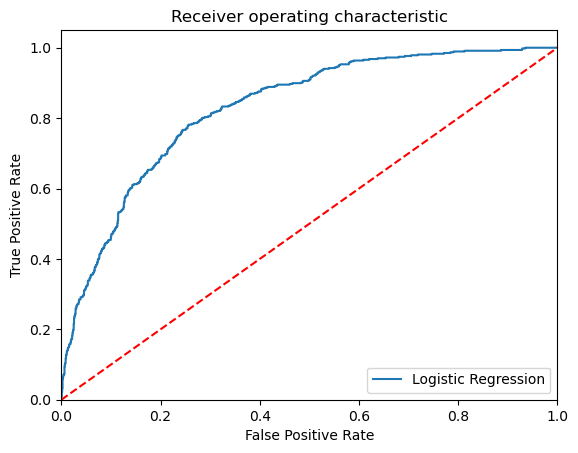

auc score:  0.8281832804344875


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

probs = grid_search.best_estimator_.predict_proba(X_test)
preds = probs[:,1]
resfpr, restpr, resthreshold = metrics.roc_curve(y_test, preds)
res_roc_auc = metrics.auc(resfpr, restpr)

plt.figure()
plt.plot(resfpr, restpr, label='Logistic Regression' % res_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('auc score: ',metrics.auc(resfpr, restpr))

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report

y_preds = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_preds))
print('accuracy score: ',accuracy_score(y_test, y_preds))
print('Precision score: ',precision_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1294
           1       0.76      0.24      0.36       467

    accuracy                           0.78      1761
   macro avg       0.77      0.61      0.61      1761
weighted avg       0.77      0.78      0.73      1761

accuracy score:  0.7779670641680864
Precision score:  0.7567567567567568


In [ ]:
pd.DataFrame(y_preds)

,0
0,0
1,0
2,0
3,0
4,1
...,...
1756,0
1757,0
1758,0
1759,0


In [ ]:
X_test

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR),Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
2666,46,1,2,1,1,2,0,2,2,128.505,0,0,0,1
5400,5,1,2,1,1,1,0,1,2,102.375,0,0,1,0
3620,1,1,0,0,0,0,0,0,0,33.410,0,0,0,1
2706,26,1,2,2,2,1,0,1,1,106.535,0,0,0,1
2,8,1,2,1,1,2,0,2,2,129.545,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,72,0,2,2,2,1,1,1,1,110.240,1,0,0,0
5327,70,1,2,2,1,1,0,1,2,118.105,0,0,0,1
6214,1,0,1,1,1,1,0,1,1,57.590,0,0,1,0
5364,12,1,2,2,2,2,0,1,1,109.980,0,0,0,1


In [ ]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [ ]:
X

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR),Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
0,2,1,1,2,2,1,0,1,1,70.005,0,0,1,0
1,2,1,2,1,1,1,0,1,1,91.910,0,0,0,1
2,8,1,2,1,1,2,0,2,2,129.545,0,0,0,1
3,28,1,2,1,1,2,1,2,2,136.240,0,0,0,1
4,49,1,2,1,2,2,0,2,2,134.810,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,1,0,0,0,0,0,0,0,27.495,0,1,0,0
7039,24,1,1,2,1,2,1,2,2,110.240,0,0,1,0
7040,72,1,2,1,2,2,0,2,2,134.160,1,0,0,0
7041,11,1,1,2,1,1,0,1,1,38.480,0,0,0,1


In [ ]:
df['Churn Probability(Predicted)'] = grid_search.best_estimator_.predict_proba(X)[:,1]

In [ ]:
df.sort_values('Churn Probability(Predicted)', ascending=False)

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Churn Probability(Predicted)
1707,1707,1,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,131.885,Yes,106.816666,-6.200000,5707.0,0.594466
1827,1827,3,Bandung,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,137.670,Yes,107.609810,-6.914744,3529.5,0.594049
584,584,1,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,131.040,Yes,106.816666,-6.200000,4066.4,0.593901
1566,1566,3,Bandung,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,136.500,Yes,107.609810,-6.914744,7748.0,0.593267
449,449,1,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.675,Yes,106.816666,-6.200000,5478.2,0.592988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,3591,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,25.935,No,106.816666,-6.200000,6619.6,0.069684
5569,5569,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Credit,25.610,No,106.816666,-6.200000,7086.3,0.069662
3135,3135,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Credit,25.610,No,106.816666,-6.200000,8366.8,0.069662
1953,1953,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Credit,25.220,No,106.816666,-6.200000,6804.2,0.069592


In [ ]:
df[df['Churn Probability(Predicted)'] < 0.2]['Churn Label'].value_counts()

No     2739
Yes     194
Name: Churn Label, dtype: int64

In [ ]:
df[(df['Churn Probability(Predicted)'] >= 0.2) & (df['Churn Probability(Predicted)'] <= 0.35)]['Churn Label'].value_counts()

No     1625
Yes     541
Name: Churn Label, dtype: int64

In [ ]:
df[df['Churn Probability(Predicted)'] > 0.35]['Churn Label'].value_counts()

Yes    1134
No      810
Name: Churn Label, dtype: int64

In [ ]:
df[df['Churn Probability(Predicted)'] >= 0.5]['Churn Label'].value_counts()

Yes    419
No     134
Name: Churn Label, dtype: int64

In [ ]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

<Axes: >

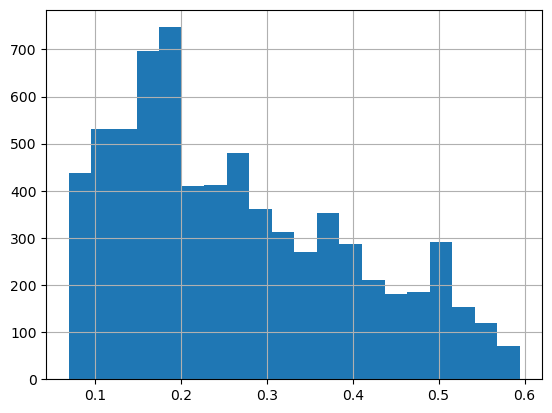

In [ ]:
df['Churn Probability(Predicted)'].hist(bins=20)

In [ ]:
df.to_excel('Churn_data_predict_proba.xlsx', index=False)

In [ ]:
pred_proba

array([0.27909248, 0.50033603, 0.5673501 , ..., 0.22517367, 0.33690237,
       0.17460502])

In [ ]:
import pickle

pickle.dump(grid_search.best_estimator_, open('churn_model_prec.pkl','wb'))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Negatives(FN) = ', cm[0,1])

print('\nFalse Positives(FP) = ', cm[1,0])

Confusion matrix

 [[1258   36]
 [ 355  112]]

True Positives(TP) =  1258

True Negatives(TN) =  112

False Negatives(FN) =  36

False Positives(FP) =  355


In [ ]:
print('Precision score: ',precision_score(y_test, y_preds))

Precision score:  0.7567567567567568


# Bayesian Optimization

In [ ]:
df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

df_train.corr()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
Customer ID,1.000000,0.275216,-0.014084,-0.245382,-0.017896,-0.053866,-0.066853,0.127109,-0.126151,-0.129152,-0.155828,-0.764752,0.014084,-0.014084,0.110169
Tenure Months,0.275216,1.000000,0.014447,0.033230,0.232373,0.253743,0.253999,0.324221,0.201053,0.205031,0.247900,-0.352229,-0.014447,0.014447,0.396406
Location,-0.014084,0.014447,1.000000,0.003433,-0.002298,-0.002570,0.007653,-0.005598,0.005141,0.001045,0.006948,-0.008596,-1.000000,1.000000,0.010404
Device Class,-0.245382,0.033230,0.003433,1.000000,0.582325,0.658718,0.663011,0.164833,0.725645,0.723065,0.905491,0.316846,-0.003433,0.003433,0.013206
Games Product,-0.017896,0.232373,-0.002298,0.582325,1.000000,0.705166,0.701690,0.423580,0.662220,0.667033,0.635534,0.023309,0.002298,-0.002298,0.095341
Music Product,-0.053866,0.253743,-0.002570,0.658718,0.705166,1.000000,0.711335,0.377079,0.703167,0.700158,0.710477,0.074205,0.002570,-0.002570,0.095666
Education Product,-0.066853,0.253999,0.007653,0.663011,0.701690,0.711335,1.000000,0.402365,0.748182,0.752952,0.737104,0.084654,-0.007653,0.007653,0.083942
Call Center,0.127109,0.324221,-0.005598,0.164833,0.423580,0.377079,0.402365,1.000000,0.361752,0.362145,0.338304,-0.164674,0.005598,-0.005598,0.119132
Video Product,-0.126151,0.201053,0.005141,0.725645,0.662220,0.703167,0.748182,0.361752,1.000000,0.807221,0.820225,0.164673,-0.005141,0.005141,0.073680
Use MyApp,-0.129152,0.205031,0.001045,0.723065,0.667033,0.700158,0.752952,0.362145,0.807221,1.000000,0.817842,0.163220,-0.001045,0.001045,0.078855


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score

# Ignore all warnings
warnings.filterwarnings("ignore")


# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Music Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Education Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Use MyApp': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Churn Label': {'No': 0, 'Yes': 1},
    # 'Payment Method': {'Pulsa':0, 'Debit':1, 'Credit':2, 'Digital Wallet':3}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Encode
df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7, stratify=y)


# Create a pipeline with feature scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', LogisticRegression())  # Logistic Regression model
])

# Define the objective function for Bayesian optimization
def objective_function(C, max_iter, solver):
    C = 10 ** C  # Convert from log scale to linear scale

    # Round 'max_iter' to the nearest integer
    max_iter = int(round(max_iter))

    solver = ['liblinear', 'lbfgs', 'newton-cg', 'saga', 'sag', 'newton-cholesky'][int(round(solver))]

    # Set hyperparameters in the pipeline
    pipeline.set_params(
        classifier__C=C,
        classifier__max_iter=max_iter,
        classifier__solver=solver
    )

    # # Fit the model and return the cross-validated score
    # score = np.mean(cross_val_score(pipeline, X_train, y_train, cv=5))

    # return score
    # Fit the model and return the cross-validated precision score
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)
    precision = precision_score(y_train, y_pred)

    return precision

# Set the parameter bounds for Bayesian optimization
pbounds = {
    'C': (-4, 100),  # Log scale for regularization strength
    'max_iter': (50, 1000),
    'solver': (0, 5)
}

# Create the BayesianOptimization object
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    random_state=42  # Set a random state for reproducibility
)

# Perform Bayesian optimization
optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']
best_C = 10 ** best_params['C']  # Convert back from log scale to linear scale
best_max_iter = int(best_params['max_iter'])
best_solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'][int(best_params['solver'])]

print("Best hyperparameters:")
print(f"C: {best_C}")
print(f"Max Iterations: {best_max_iter}")
print(f"Solver: {best_solver}")

|   iter    |  target   |     C     | max_iter  |  solver   |
-------------------------------------------------------------
| 1         | 0.6482    | 34.95     | 953.2     | 3.66      |
| 2         | 0.6482    | 58.26     | 198.2     | 0.78      |
| 3         | 0.6482    | 2.041     | 872.9     | 3.006     |
| 4         | 0.6485    | 69.64     | 69.56     | 4.85      |
| 5         | 0.6482    | 82.57     | 251.7     | 0.9091    |
| 6         | 0.6482    | 13.65     | 50.15     | 3.591     |
| 7         | 0.6485    | 69.94     | 70.28     | 4.991     |
| 8         | 0.6482    | 99.4      | 54.14     | 2.244     |
| 9         | 0.6482    | 54.89     | 78.3      | 0.5079    |
| 10        | 0.6482    | 76.36     | 66.22     | 4.382     |
| 11        | 0.6482    | 70.41     | 73.02     | 0.7753    |
| 12        | 0.6482    | 66.5      | 68.59     | 1.512     |
| 13        | 0.6482    | 65.78     | 72.91     | 3.463     |
| 14        | 0.6482    | 70.4      | 69.42     | 2.689     |
| 15    

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

# Create the best Logistic Regression model
best_logreg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        C=best_C,
        max_iter=best_max_iter,
        solver=best_solver,
    ))
])

# Fit the model to the training data
best_logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_logreg_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best Logistic Regression model: {accuracy:.4f}")


print(classification_report(y_test, y_pred))

Accuracy of the best Logistic Regression model: 0.8024
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.66      0.53      0.59       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



In [ ]:
# Load your pre-trained model
import pickle

with open('churn_model.pkl', 'rb') as file:
    model = pickle.load(file)

y_pred = model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best Logistic Regression model: {accuracy:.4f}")


print(classification_report(y_test, y_pred))

Accuracy of the best Logistic Regression model: 0.8024
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.66      0.53      0.59       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



In [ ]:
X_test

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR),Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
2666,46,1,2,1,1,2,0,2,2,128.505,0,0,0,1
5400,5,1,2,1,1,1,0,1,2,102.375,0,0,1,0
3620,1,1,0,0,0,0,0,0,0,33.410,0,0,0,1
2706,26,1,2,2,2,1,0,1,1,106.535,0,0,0,1
2,8,1,2,1,1,2,0,2,2,129.545,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,72,0,2,2,2,1,1,1,1,110.240,1,0,0,0
5327,70,1,2,2,1,1,0,1,2,118.105,0,0,0,1
6214,1,0,1,1,1,1,0,1,1,57.590,0,0,1,0
5364,12,1,2,2,2,2,0,1,1,109.980,0,0,0,1


In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
best_logreg_model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=4.3606184782174204e+69, max_iter=69,
                                    solver='sag'))])>

In [ ]:
best_logreg_model.feature_names_in_

array(['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Monthly Purchase (Thou. IDR)',
       'Payment Method_Credit', 'Payment Method_Debit',
       'Payment Method_Digital Wallet', 'Payment Method_Pulsa'],
      dtype=object)

In [ ]:
len({'Device Class': 1, 'Location': 0, 'Games Product': 2, 'Music Product': 1, 'Education Product': 1, 'Call Center': 0, 'Video Product': 2, 'Payment Method_Pulsa': 0, 'Payment Method_Debit': 1, 'Payment Method_Credit': 0, 'Payment Method_Digital Wallet': 0, 'Tenure Months': 1, 'Monthly Purchase (Thou. IDR)': 12344.0})

13

In [ ]:
import pickle

pickle.dump(best_logreg_model, open('churn_model.pkl','wb'))

# Ridge Classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from sklearn.linear_model import RidgeClassifier


# Ignore all warnings
warnings.filterwarnings("ignore")


# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Music Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Education Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Use MyApp': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'Churn Label': {'No': 0, 'Yes': 1},
    'Payment Method': {'Pulsa':0, 'Debit':1, 'Credit':2, 'Digital Wallet':3}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Encode
# df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7, stratify=y)

# Create a pipeline with feature scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', Rand())  # Logistic Regression model
])

# Define hyperparameters for grid search
# Define the parameter grid for the RidgeClassifier within the pipeline
param_grid = {
    'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # 'classifier__' is used to specify the parameter for RidgeClassifier in the pipeline
    'classifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'classifier__max_iter': [None, 100, 500, 1000],
    'classifier__tol': [1e-3, 1e-4, 1e-5]
}
# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='precision')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Train best score:", grid_search.best_score_)

Best hyperparameters: {'classifier__alpha': 0.1, 'classifier__max_iter': None, 'classifier__solver': 'auto', 'classifier__tol': 0.001}
Test set accuracy: 0.6666666666666666
Train best score: 0.6547115005273105


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_preds = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_preds))
print('accuracy score: ',accuracy_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.67      0.48      0.56       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761

accuracy score:  0.7989778534923339


# Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude'], axis=1)

# Encode
df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, shuffle=True)

# Create a pipeline with feature scaling and Random Forest classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', RandomForestClassifier())  # Random Forest Classifier
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [4,7,10]  # Minimum samples required to be at a leaf node
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best Model Train", grid_search.best_score_)

Best hyperparameters: {'classifier__max_depth': 10, 'classifier__max_features': 4, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Test set accuracy: 0.8001135718341851
Best Model Train 0.7942059005730217


In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'Location', 'Payment Method', 'CLTV (Predicted Thou. IDR)', 'Use MyApp'], axis=1)

# Encode
#df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, shuffle=True)

# Create a pipeline with feature scaling and Random Forest classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', RandomForestClassifier())  # Random Forest Classifier
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [4,7,10]  # Minimum samples required to be at a leaf node
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best Model Train", grid_search.best_score_)

Best hyperparameters: {'classifier__max_depth': 5, 'classifier__max_features': 4, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Test set accuracy: 0.8006814310051107
Best Model Train 0.7919341412420629


# LDA

In [ ]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())

Jakarta    5031
Bandung    2012
Name: Location, dtype: int64
High End    3096
Mid End     2421
Low End     1526
Name: Device Class, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: Games Product, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: Music Product, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: Education Product, dtype: int64
No     4999
Yes    2044
Name: Call Center, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: Video Product, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: Use MyApp, dtype: int64
Pulsa             2365
Digital Wallet    1612
Debit             1544
Credit            1522
Name: Payment Method, dtype: int64
No     5174
Yes    1869
Name: Churn Label, dtype: int64


In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import LinearDiscriminantAnalysis
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

def advanced_preprocessing(data, categorical_column, columns):

    # Define a custom function for calculating Q1
    def q1(x):
        return np.percentile(x, 25)

    # Define a custom function for calculating Q3
    def q3(x):
        return np.percentile(x, 75)

    # Create a pivot table based on the specified categorical column with custom aggregation functions
    agg_funcs = [
        np.mean,
        np.median,
        q1,
        q3]


    # Create a pivot table based on the specified categorical column
    job_data = data.pivot_table(index=categorical_column, values=columns, aggfunc=agg_funcs)


    # Rename columns and reset the index for mean, median, and amax dataframes
    job_data.columns = [f'{stat}_{col}' for stat, col in job_data.columns]
    job_data.reset_index(inplace=True)
    print(job_data)

    # Merge the resulting job_data with the original data
    dataset = pd.merge(data, job_data, how="left", on=categorical_column)

    return dataset.drop(categorical_column, axis=1)


# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    # 'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    # 'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    # 'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    # 'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    # 'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Advanced preprocess

# categorical_column = 'Payment Method'
# columns_to_preprocess = 'Tenure Months'
# preprocessed_data = advanced_preprocessing(df_train, categorical_column, columns_to_preprocess)

# Encode
df_train = pd.get_dummies(df_train)

# Split data
train = df_train.copy()

y = train.pop('Churn Label')
X = train


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)
# Create a pipeline with feature scaling and Linear Discriminant Analysis
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', LinearDiscriminantAnalysis())  # Linear Discriminant Analysis
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__solver': ['svd', 'lsqr', 'eigen'],  # Solver options
    'classifier__n_components': [None, 1, 2],  # Number of components to keep
    'classifier__shrinkage': ['auto', None]  # Shrinkage options
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)
# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best Model Train", grid_search.best_score_)

ValueError: Invalid parameter 'n_components' for estimator LogisticRegression(). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

## Advanced Preprocessing

In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np

def advanced_preprocessing(data, categorical_column, columns):

    # Define a custom function for calculating Q1
    def q1(x):
        return np.percentile(x, 25)

    # Define a custom function for calculating Q3
    def q3(x):
        return np.percentile(x, 75)

    # Create a pivot table based on the specified categorical column with custom aggregation functions
    agg_funcs = [
        np.mean,
        np.median,
        np.amax,
        np.amin,
        q1,
        q3]


    # Create a pivot table based on the specified categorical column
    job_data = data.pivot_table(index=categorical_column, values=columns, aggfunc=agg_funcs)


    # Rename columns and reset the index for mean, median, and amax dataframes
    job_data.columns = [f'{stat}_{col}' for stat, col in job_data.columns]
    job_data.reset_index(inplace=True)
    print(job_data)

    # Merge the resulting job_data with the original data
    dataset = pd.merge(data, job_data, how="left", on=categorical_column)

    return dataset.drop(categorical_column, axis=1)


In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

def advanced_preprocessing(data, categorical_column, columns):

    # Define a custom function for calculating Q1
    def q1(x):
        return np.percentile(x, 25)

    # Define a custom function for calculating Q3
    def q3(x):
        return np.percentile(x, 75)

    # Create a pivot table based on the specified categorical column with custom aggregation functions
    agg_funcs = [
        np.mean,
        np.median,
        q1,
        q3]


    # Create a pivot table based on the specified categorical column
    job_data = data.pivot_table(index=categorical_column, values=columns, aggfunc=agg_funcs)


    # Rename columns and reset the index for mean, median, and amax dataframes
    job_data.columns = [f'{stat}_{col}' for stat, col in job_data.columns]
    job_data.reset_index(inplace=True)
    print(job_data)

    # Merge the resulting job_data with the original data
    dataset = pd.merge(data, job_data, how="left", on=categorical_column)

    return dataset.drop(categorical_column, axis=1)

# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'Location', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Advanced preprocess

categorical_column = 'Payment Method'
columns_to_preprocess = 'Tenure Months'
preprocessed_data = advanced_preprocessing(df_train, categorical_column, columns_to_preprocess)

# Split data
train = preprocessed_data.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7, stratify=y)

# Create a pipeline with feature scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', LogisticRegression())  # Logistic Regression model
])

# Define hyperparameters for grid search
# Define hyperparameters for grid search
param_grid = {
    'classifier__penalty': [None, 'l1', 'l2', 'elasticnet'],  # Use only 'l2' penalty
    'classifier__C': [0.001, 0.01, 0.07, 0.1, 1, 10],
    'classifier__max_iter': [100, 200, 300, 500],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'classifier__l1_ratio': [None, 0.1, 0.3, 0.5, 0.7, 0.9] # Use 'lbfgs' solver with 'l2' penalty
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best training score:", grid_search.best_score_)

   Payment Method  mean_Tenure Months  median_Tenure Months  q1_Tenure Months  \
0          Credit           43.269382                    47                23   
1           Debit           43.656736                    48                23   
2  Digital Wallet           21.830025                    15                 3   
3           Pulsa           25.174630                    18                 5   

   q3_Tenure Months  
0                66  
1                66  
2                36  
3                43  
Best hyperparameters: {'classifier__C': 1, 'classifier__l1_ratio': None, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Test set accuracy: 0.8034066713981547
Best training score: 0.7965951196294411


### Stacking

In [ ]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

def advanced_preprocessing(data, categorical_column, columns):

    # Define a custom function for calculating Q1
    def q1(x):
        return np.percentile(x, 25)

    # Define a custom function for calculating Q3
    def q3(x):
        return np.percentile(x, 75)

    # Create a pivot table based on the specified categorical column with custom aggregation functions
    agg_funcs = [
        np.mean,
        np.median,
        q1,
        q3]


    # Create a pivot table based on the specified categorical column
    job_data = data.pivot_table(index=categorical_column, values=columns, aggfunc=agg_funcs)


    # Rename columns and reset the index for mean, median, and amax dataframes
    job_data.columns = [f'{stat}_{col}' for stat, col in job_data.columns]
    job_data.reset_index(inplace=True)
    print(job_data)

    # Merge the resulting job_data with the original data
    dataset = pd.merge(data, job_data, how="left", on=categorical_column)

    return dataset.drop(categorical_column, axis=1)

# Ignore all warnings
warnings.filterwarnings("ignore")

# Replace Column Value
# Define a mapping for each column
mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Advanced preprocess

categorical_column = 'Payment Method'
columns_to_preprocess = 'Monthly Purchase (Thou. IDR)'
preprocessed_data = advanced_preprocessing(df_train, categorical_column, columns_to_preprocess)

# Split data
train = preprocessed_data.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)

# Define base classifiers
level0 = list()
level0.append(('GBM', GradientBoostingClassifier()))
level0.append(('RF', RandomForestClassifier()))
level0.append(('LR', LogisticRegression()))
level0.append(('ETC', ExtraTreesClassifier()))
level0.append(('LGM', LGBMClassifier()))

# Define meta learner model
level1 = XGBClassifier(random_state=7)

# Define the stacking ensemble
model_stack = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# Fit the model on all available data
model_stack.fit(X_train, y_train)

# Create a pipeline with feature scaling and stacking classifier
stacked_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', model_stack)  # Stacking Classifier
])

# Fit the stacked pipeline to the data
stacked_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = stacked_pipeline.score(X_test, y_test)
print("Test set accuracy:", accuracy)

   Payment Method  mean_Monthly Purchase (Thou. IDR)  \
0          Credit                          86.466101   
1           Debit                          87.350444   
2  Digital Wallet                          57.092177   
3           Pulsa                          99.132558   

   median_Monthly Purchase (Thou. IDR)  q1_Monthly Purchase (Thou. IDR)  \
0                              94.9325                         50.26125   
1                              95.0300                         53.41375   
2                              45.1100                         26.19500   
3                             104.7150                         78.19500   

   q3_Monthly Purchase (Thou. IDR)  
0                        118.10500  
1                        120.85125  
2                         84.38625  
3                        123.11000  
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1475, number of negative: 4159
[LightGBM

KeyboardInterrupt: 

# Extra Trees

In [ ]:
def advanced_preprocessing(data, categorical_column, columns):

    # Define a custom function for calculating Q1
    def q1(x):
        return np.percentile(x, 25)

    # Define a custom function for calculating Q3
    def q3(x):
        return np.percentile(x, 75)

    # Create a pivot table based on the specified categorical column with custom aggregation functions
    agg_funcs = [
        np.mean,
        np.median,
        q1,
        q3]


    # Create a pivot table based on the specified categorical column
    job_data = data.pivot_table(index=categorical_column, values=columns, aggfunc=agg_funcs)


    # Rename columns and reset the index for mean, median, and amax dataframes
    job_data.columns = [f'{stat}_{col}' for stat, col in job_data.columns]
    job_data.reset_index(inplace=True)
    print(job_data)

    # Merge the resulting job_data with the original data
    dataset = pd.merge(data, job_data, how="left", on=categorical_column)

    return dataset.drop(categorical_column, axis=1)

mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)', 'Location'], axis=1)

# Advanced preprocess

categorical_column = 'Payment Method'
columns_to_preprocess = 'Monthly Purchase (Thou. IDR)'
preprocessed_data = advanced_preprocessing(df_train, categorical_column, columns_to_preprocess)

# Split data
train = preprocessed_data.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, shuffle=True)


   Payment Method  mean_Monthly Purchase (Thou. IDR)  \
0          Credit                          86.466101   
1           Debit                          87.350444   
2  Digital Wallet                          57.092177   
3           Pulsa                          99.132558   

   median_Monthly Purchase (Thou. IDR)  q1_Monthly Purchase (Thou. IDR)  \
0                              94.9325                         50.26125   
1                              95.0300                         53.41375   
2                              45.1100                         26.19500   
3                             104.7150                         78.19500   

   q3_Monthly Purchase (Thou. IDR)  
0                        118.10500  
1                        120.85125  
2                         84.38625  
3                        123.11000  


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

model_etc = ExtraTreesClassifier(random_state=0)
model_etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [ ]:
n_estimators=[100,300,500]
max_features=[4,7,10]
min_samples_leaf=[1,3,5]
criterion=['gini','entropy']
class_weight=["balanced", None]
random_state = [0]
grid = dict(n_estimators=n_estimators,
            max_features=max_features,
            criterion=criterion,
            min_samples_leaf=min_samples_leaf,
            class_weight=class_weight,
            random_state=random_state)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=model_etc, param_grid=grid, n_jobs=-1, cv=cv, scoring='balanced_accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.752540 using {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 0}
0.662421 (0.016154) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 0}
0.665006 (0.015661) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 300, 'random_state': 0}
0.665684 (0.015322) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 0}
0.742808 (0.012171) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 100, 'random_state': 0}
0.744828 (0.012297) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 300, 'random_state': 0}
0.745909 (0.012892) with: {'class_weight': 'balanced', 'c

# CalibratedClassifier

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

def advanced_preprocessing(data, categorical_column, columns):

    # Define a custom function for calculating Q1
    def q1(x):
        return np.percentile(x, 25)

    # Define a custom function for calculating Q3
    def q3(x):
        return np.percentile(x, 75)

    # Create a pivot table based on the specified categorical column with custom aggregation functions
    agg_funcs = [
        np.mean,
        np.median,
        q1,
        q3]


    # Create a pivot table based on the specified categorical column
    job_data = data.pivot_table(index=categorical_column, values=columns, aggfunc=agg_funcs)


    # Rename columns and reset the index for mean, median, and amax dataframes
    job_data.columns = [f'{stat}_{col}' for stat, col in job_data.columns]
    job_data.reset_index(inplace=True)
    print(job_data)

    # Merge the resulting job_data with the original data
    dataset = pd.merge(data, job_data, how="left", on=categorical_column)

    return dataset.drop(categorical_column, axis=1)

mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Advanced preprocess

categorical_column = 'Payment Method'
columns_to_preprocess = 'Tenure Months'
preprocessed_data = advanced_preprocessing(df_train, categorical_column, columns_to_preprocess)

# Split data
train = preprocessed_data.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, shuffle=True)



# Create a pipeline with feature scaling and calibrated classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', CalibratedClassifierCV(LogisticRegression(), method='sigmoid'))  # Calibrated classifier with 'sigmoid' method
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__base_estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__base_estimator__C': [0.001, 0.01, 0.07, 0.1, 1, 10],
    'classifier__base_estimator__max_iter': [100, 200, 300, 500],
    'classifier__base_estimator__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'classifier__base_estimator__l1_ratio': [None, 0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__method': ['sigmoid', 'isotonic']  # Method for probability calibration
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best training score:", grid_search.best_score_)

   Payment Method  mean_Tenure Months  median_Tenure Months  q1_Tenure Months  \
0          Credit           43.269382                    47                23   
1           Debit           43.656736                    48                23   
2  Digital Wallet           21.830025                    15                 3   
3           Pulsa           25.174630                    18                 5   

   q3_Tenure Months  
0                66  
1                66  
2                36  
3                43  
Best hyperparameters: {'classifier__base_estimator__C': 1, 'classifier__base_estimator__l1_ratio': 0.1, 'classifier__base_estimator__max_iter': 100, 'classifier__base_estimator__penalty': 'elasticnet', 'classifier__base_estimator__solver': 'saga', 'classifier__method': 'sigmoid'}
Test set accuracy: 0.8086314593980692
Best training score: 0.7960963705169003


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

def advanced_preprocessing(data, categorical_column, columns):

    # Define a custom function for calculating Q1
    def q1(x):
        return np.percentile(x, 25)

    # Define a custom function for calculating Q3
    def q3(x):
        return np.percentile(x, 75)

    # Create a pivot table based on the specified categorical column with custom aggregation functions
    agg_funcs = [
        np.mean,
        np.median,
        q1,
        q3]


    # Create a pivot table based on the specified categorical column
    job_data = data.pivot_table(index=categorical_column, values=columns, aggfunc=agg_funcs)


    # Rename columns and reset the index for mean, median, and amax dataframes
    job_data.columns = [f'{stat}_{col}' for stat, col in job_data.columns]
    job_data.reset_index(inplace=True)
    print(job_data)

    # Merge the resulting job_data with the original data
    dataset = pd.merge(data, job_data, how="left", on=categorical_column)

    return dataset.drop(categorical_column, axis=1)

mapping = {
    'Device Class': {'Low End': 0, 'Mid End': 1, 'High End': 2},
    'Location': {'Jakarta': 1, 'Bandung': 0},
    'Games Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Music Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Education Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Call Center': {'No': 0, 'Yes': 1},
    'Video Product': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Use MyApp': {'No internet service': 0, 'No': 0, 'Yes': 1},
    'Churn Label': {'No': 0, 'Yes': 1}
}

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df_train = df.replace(mapping)

# Preparation
df_train = df_train.drop(['Customer ID', 'Longitude', 'Latitude', 'CLTV (Predicted Thou. IDR)'], axis=1)

# Advanced preprocess

categorical_column = 'Payment Method'
columns_to_preprocess = 'Tenure Months'
preprocessed_data = advanced_preprocessing(df_train, categorical_column, columns_to_preprocess)

# Split data
train = preprocessed_data.copy()

y = train.pop('Churn Label')
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)



# Create a pipeline with feature scaling and calibrated classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', CalibratedClassifierCV(LogisticRegression(), method='sigmoid'))  # Calibrated classifier with 'sigmoid' method
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__base_estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__base_estimator__C': [0.001, 0.01, 0.07, 0.1, 1, 10],
    'classifier__base_estimator__max_iter': [100, 200, 300, 500],
    'classifier__base_estimator__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'classifier__base_estimator__l1_ratio': [None, 0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__method': ['sigmoid', 'isotonic']  # Method for probability calibration
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy:", accuracy)
print("Best training score:", grid_search.best_score_)

In [ ]:
import json

data = pd.read_json('children.json')

In [ ]:
data.keys()

Index(['props', 'type', 'namespace'], dtype='object')

In [ ]:
data['props']

RangeIndex(start=0, stop=6, step=1)

In [ ]:
entry['props']['children']

SyntaxError: incomplete input (3769313319.py, line 1)

In [ ]:
ids = [entry['props']for entry in data if 'props' in entry and 'id' in entry['props']]
print(ids)

TypeError: string indices must be integers